<a href="https://colab.research.google.com/github/jaqueline-amorim/-Painel-interativo-com-Pysal-e-Streamlit/blob/main/Painel_interativo_com_Pysal_e_Streamlit_nov_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Painel interativo com PySal e Streamlit**
O objetivo deste projeto é criar um painel interativo com dados geoestatísticos da Península de Itapagipe, Salvador-BA. Área alvo de vários investimentos estatais com víeis turísticos. Afim de comparar dados dos censos 2000 e 2010.


In [1]:
# Preparando o ambiente no Google Drive:

#importando a biblioteca
from google.colab import drive

# Isso irá pedir sua autorização
drive.mount('/content/drive')

# Agora, seu Drive estará disponível em: /content/drive/My Drive

Mounted at /content/drive


In [ ]:
# Instalando as Bibliotecas
!pip install streamlit
!pip install pyngrok
!pip install streamlit-folium
!pip install pandas
!pip install geopandas
!pip install plotly
!pip install folium
!pip install pysal
!pip install contextily
!pip install mapclassify
!pip install esda

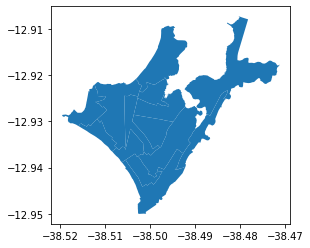

In [3]:
#Importando os dados
import geopandas as gpd
df = '/content/drive/My Drive/geo/itapagipe/Bairros_Itapagipe.geojson'
ssa = gpd.read_file(df)
ssa.plot()

In [4]:
#Visualizando a tabela de atributos 
ssa

,Id,nome,código,população_total_2000,população_total_2010,homens_2000,homens_2010,mulheres_2000,mulheres_2010,idade_0_a_14_2000,...,infraestrutura_2000,infraestrutura_2010,densidade_demográfica_2000,densidade_demográfica_2010,idade_15_a_64_2010,latitude,longitude,IDHM_2000,IDHM_2010,geometry
0,5,Lobato,88,29966,29169,48.81,46.96,51.19,53.04,29.92,...,87.17,90.01,198.70,193.40,71.69,-12.919622,-38.482086,0.542,0.661,"MULTIPOLYGON (((-38.47822 -12.90786, -38.47834..."
1,10,Ribeira,89,18692,19578,46.52,46.01,53.48,53.99,22.66,...,96.55,99.18,219.40,229.80,73.13,-12.916597,-38.497103,0.743,0.828,"MULTIPOLYGON (((-38.49643 -12.92093, -38.49670..."
2,8,Massaranduba,90,29297,20160,47.15,46.74,52.85,53.26,26.58,...,69.90,96.10,363.00,379.20,72.26,-12.926994,-38.497329,0.668,0.773,"MULTIPOLYGON (((-38.49218 -12.92673, -38.49287..."
3,12,Santa Luzia,91,6324,7702,48.07,46.47,51.93,53.53,29.64,...,68.32,93.63,159.80,194.60,71.21,-12.932259,-38.488624,0.542,0.661,"MULTIPOLYGON (((-38.48290 -12.92511, -38.48292..."
4,2,Bonfim,92,10437,9446,45.16,45.14,54.84,54.86,18.25,...,99.81,98.59,115.80,104.80,70.62,-12.927211,-38.507622,0.742,0.854,"MULTIPOLYGON (((-38.50236 -12.92336, -38.50242..."
5,6,Mangueira,93,12202,12310,47.52,46.63,52.48,53.37,27.59,...,81.14,95.66,423.50,477.20,72.48,-12.923901,-38.499026,0.582,0.691,"MULTIPOLYGON (((-38.49643 -12.92093, -38.49635..."
6,3,Calçada,143,4650,5024,48.99,48.49,51.01,51.51,25.01,...,90.27,87.08,63.30,68.40,71.06,-12.943456,-38.498555,0.613,0.679,"MULTIPOLYGON (((-38.49260 -12.93684, -38.49294..."
7,7,Mares,144,2277,2359,46.46,45.49,53.54,54.51,18.84,...,95.17,99.39,85.90,89.00,72.36,-12.940743,-38.501816,0.706,0.799,"MULTIPOLYGON (((-38.50257 -12.93748, -38.50246..."
8,11,Roma,145,3459,3636,44.26,44.53,55.74,55.47,19.66,...,97.86,99.73,128.20,134.70,72.31,-12.935764,-38.504431,0.706,0.799,"MULTIPOLYGON (((-38.50141 -12.93635, -38.50150..."
9,1,Boa Viagem,146,2463,2322,45.43,45.31,54.57,54.69,17.99,...,98.45,99.53,102.70,96.80,69.46,-12.932684,-38.511100,0.662,0.783,"MULTIPOLYGON (((-38.50745 -12.93572, -38.50850..."


In [5]:
#Renomeando as colunas 
columns = {
        'NM_BAIRROS' : 'nome',
        'Cod_bairro' : 'código',
        'Id' : 'id',
        'pop_t_2000' : 'população_total_2000',
        'pop_t_2010' : 'população_total_2010',
        'pop_h_2000' : 'homens_2000',
        'pop_h_2010' : 'homens_2010',
        'pop_m_2000' : 'mulheres_2000',
        'pop_m_2010' : 'mulheres_2010',
        '0_14_2000' : 'idade_0_a_14_2000',
        '0_14_2010' : 'idade_0_a_14_2010',
        '15_64_2000' : 'idade_15_a_64_2000',
        '15_64_2010' : 'idade_15_a_64_2010',
        '65+_2000' : 'idade_65+_2000',
        '65+_2010' : 'idade_65+_2010',
        'pt_na_2000' : 'população_não_alfabetizada_2000',
        'pt_na_2010' : 'população_não_alfabetizada_2010',
        'ren_m_2000' : 'renda_média_2000',
        'rem_m_2010' : 'renda_média_2010',
        'dom_p_2000' : 'domicílios_particulares_2000',
        'dom_p_2010' : 'domicílios_particulares_2010',
        'dom_s_2000' : 'domicílios_subnormais_2000',
        'dom_s_2010' : 'domicílios_subnormais_2010',
        'IDHM_2000' : 'idhm_2000',
        'IDHM_2010' : 'idhm_2010',
        'infra_2000' : 'infraestrutura_2000',
        'infra_2010' : 'infraestrutura_2010',
        'dens_2000' : 'densidade_demográfica_2000',
        'dens_2010' : 'densidade_demográfica_2010',
        'Y' : 'latitude',
        'X' : 'longitude'
}

In [6]:
#Visualizando os dados
import geopandas as gpd
data = gpd.read_file(df, index_col='Cod_bairro')
data.head

<bound method NDFrame.head of     Id                             nome  código  população_total_2000  \
0    5                           Lobato      88                 29966   
1   10                          Ribeira      89                 18692   
2    8                     Massaranduba      90                 29297   
3   12                      Santa Luzia      91                  6324   
4    2                           Bonfim      92                 10437   
5    6                        Mangueira      93                 12202   
6    3                          Calçada     143                  4650   
7    7                            Mares     144                  2277   
8   11                             Roma     145                  3459   
9    1                       Boa Viagem     146                  2463   
10  13                          Uruguai     147                 31004   
11  14  Vila Ruy Barbosa/Jadim Cruzeiro     148                 17386   
12   4               

In [7]:
#Visualizando a tabela de atributos renomeada 
data = data.rename(columns=columns)
data.head()

,id,nome,código,população_total_2000,população_total_2010,homens_2000,homens_2010,mulheres_2000,mulheres_2010,idade_0_a_14_2000,...,infraestrutura_2000,infraestrutura_2010,densidade_demográfica_2000,densidade_demográfica_2010,idade_15_a_64_2010,latitude,longitude,idhm_2000,idhm_2010,geometry
0,5,Lobato,88,29966,29169,48.81,46.96,51.19,53.04,29.92,...,87.17,90.01,198.7,193.4,71.69,-12.919622,-38.482086,0.542,0.661,"MULTIPOLYGON (((-38.47822 -12.90786, -38.47834..."
1,10,Ribeira,89,18692,19578,46.52,46.01,53.48,53.99,22.66,...,96.55,99.18,219.4,229.8,73.13,-12.916597,-38.497103,0.743,0.828,"MULTIPOLYGON (((-38.49643 -12.92093, -38.49670..."
2,8,Massaranduba,90,29297,20160,47.15,46.74,52.85,53.26,26.58,...,69.90,96.10,363.0,379.2,72.26,-12.926994,-38.497329,0.668,0.773,"MULTIPOLYGON (((-38.49218 -12.92673, -38.49287..."
3,12,Santa Luzia,91,6324,7702,48.07,46.47,51.93,53.53,29.64,...,68.32,93.63,159.8,194.6,71.21,-12.932259,-38.488624,0.542,0.661,"MULTIPOLYGON (((-38.48290 -12.92511, -38.48292..."
4,2,Bonfim,92,10437,9446,45.16,45.14,54.84,54.86,18.25,...,99.81,98.59,115.8,104.8,70.62,-12.927211,-38.507622,0.742,0.854,"MULTIPOLYGON (((-38.50236 -12.92336, -38.50242..."


In [8]:
#Transformando a tabela em lista
data[list(columns.values())]

,nome,código,id,população_total_2000,população_total_2010,homens_2000,homens_2010,mulheres_2000,mulheres_2010,idade_0_a_14_2000,...,domicílios_subnormais_2000,domicílios_subnormais_2010,idhm_2000,idhm_2010,infraestrutura_2000,infraestrutura_2010,densidade_demográfica_2000,densidade_demográfica_2010,latitude,longitude
0,Lobato,88,5,29966,29169,48.81,46.96,51.19,53.04,29.92,...,1739.0,5227.0,0.542,0.661,87.17,90.01,198.70,193.40,-12.919622,-38.482086
1,Ribeira,89,10,18692,19578,46.52,46.01,53.48,53.99,22.66,...,159.0,2281.0,0.743,0.828,96.55,99.18,219.40,229.80,-12.916597,-38.497103
2,Massaranduba,90,8,29297,20160,47.15,46.74,52.85,53.26,26.58,...,743.0,1727.0,0.668,0.773,69.90,96.10,363.00,379.20,-12.926994,-38.497329
3,Santa Luzia,91,12,6324,7702,48.07,46.47,51.93,53.53,29.64,...,96.0,1080.0,0.542,0.661,68.32,93.63,159.80,194.60,-12.932259,-38.488624
4,Bonfim,92,2,10437,9446,45.16,45.14,54.84,54.86,18.25,...,0.0,0.0,0.742,0.854,99.81,98.59,115.80,104.80,-12.927211,-38.507622
5,Mangueira,93,6,12202,12310,47.52,46.63,52.48,53.37,27.59,...,0.0,2074.0,0.582,0.691,81.14,95.66,423.50,477.20,-12.923901,-38.499026
6,Calçada,143,3,4650,5024,48.99,48.49,51.01,51.51,25.01,...,197.0,240.0,0.613,0.679,90.27,87.08,63.30,68.40,-12.943456,-38.498555
7,Mares,144,7,2277,2359,46.46,45.49,53.54,54.51,18.84,...,0.0,0.0,0.706,0.799,95.17,99.39,85.90,89.00,-12.940743,-38.501816
8,Roma,145,11,3459,3636,44.26,44.53,55.74,55.47,19.66,...,0.0,0.0,0.706,0.799,97.86,99.73,128.20,134.70,-12.935764,-38.504431
9,Boa Viagem,146,1,2463,2322,45.43,45.31,54.57,54.69,17.99,...,0.0,0.0,0.662,0.783,98.45,99.53,102.70,96.80,-12.932684,-38.511100


In [9]:
#Visualizando os dados únicos 
data.nome.unique().tolist()

['Lobato',
 'Ribeira',
 'Massaranduba',
 'Santa Luzia',
 'Bonfim',
 'Mangueira',
 'Calçada',
 'Mares',
 'Roma',
 'Boa Viagem',
 'Uruguai',
 'Vila Ruy Barbosa/Jadim Cruzeiro',
 'Caminho de Areia',
 'Monte Serrat']

In [10]:
#Convertendo os dados para SIRGAS 2000 - UTM 24S
bairros = gpd.read_file('/content/drive/My Drive/geo/itapagipe/Bairros_Itapagipe.geojson')
bairros = bairros.to_crs(31984)

In [11]:
%%writefile app.py
import streamlit as st
from streamlit_folium import folium_static
import folium
import seaborn as sns
import geopandas as gpd
import pandas as pd
import plotly.express as px
import libpysal as lps
import mapclassify 
import numpy as np
import esda
import contextily as cx
import matplotlib.pyplot as plt
from libpysal.weights.contiguity import Queen

Writing app.py


In [12]:
#Importando as bibliotecas 
%%writefile app.py
import streamlit as st
from streamlit_folium import folium_static
import folium
import seaborn as sns
import geopandas as gpd
import pandas as pd
import plotly.express as px
import libpysal as lps
import mapclassify 
import numpy as np
import esda
import contextily as cx
import matplotlib.pyplot as plt
from libpysal.weights.contiguity import Queen

#Carregando os dados
#polygons = gpd.read_file('/content/drive/My Drive/geo/itapagipe/Bairros_Itapagipe.geojson')
#points = gpd.read_file('/content/drive/My Drive/geo/itapagipe/Bairros_Itapagipe_pt.geojson')

dados = pd.read_csv('/content/drive/My Drive/geo/itapagipe/Tabela_bairros.csv', encoding='UTF-8')
dados_r = pd.read_csv('/content/drive/My Drive/geo/itapagipe/Tabela_bairros_r.csv', encoding='UTF-8')

bairros = gpd.read_file('/content/drive/My Drive/geo/itapagipe/Bairros_Itapagipe.geojson')
bairros_pt = gpd.read_file('/content/drive/My Drive/geo/itapagipe/Bairros_Itapagipe_pt.geojson')
ssa_bairros = gpd.read_file('/content/drive/My Drive/geo/itapagipe/SSA_Bairros.geojson')

#Layout
st.title('Península de Itapagipe')
st.sidebar.title('Península de Itapagipe')
paginas = ['Página Inicial','Dados', 'Metadados','Gráficos','Mapas','Mapas geoestatísticos','Informações']
pagina = st.sidebar.selectbox('Selecione a página', paginas)
st.sidebar.markdown('# Painel interativo')

st.sidebar.markdown(
    """
    O objetivo deste projeto é apresentar um painel interativo com dados geoestatísticos da Península de Itapagipe, Salvador-BA. 
    Afim de comparar dados dos censos 2000 e 2010.
    """
)

st.sidebar.markdown('# Produção')
st.sidebar.image('/content/drive/My Drive/geo/itapagipe/UNEB-PROET.jpg', use_column_width = 'always')


if pagina == 'Página Inicial':
    st.markdown('# Página Inicial')
    st.image('/content/drive/My Drive/geo/itapagipe/I5.jpg', width = 400, use_column_width = 'always')

    st.markdown(
        """
        A Península de Itapagipe tem localização lindeira à Baía de Todos os Santos, topografia suave e clima refrescante, é uma área que tem
        vida própria, guardando ainda em muitos locais, um estilo de vida tradicional, sob muitos aspectos, no qual o sentido de pertencimento
        faz-se presente nas relações com o lugar e com os vizinhos, que ainda mantêm em vários bairros, o hábito de colocar as cadeiras na 
        porta e “prosear” com a vizinhança. 
        """
    )

    st.markdown(
        """
        A Península de Itapagipe fica localizada a poucos 8km do centralizado Mercado Modelo de Salvador (BA) Para quem quer adentrar na diversidade 
        de atrações de Salvador, fugindo dos roteiros tradicionais, um passeio pelo bairro do Bomfim e adjacências, ao domingo, é a medida completa 
        para se conhecer a autêntica baianidade.
        """
    )

    st.markdown('# Painel interativo')
    st.markdown(
        """
     O objetivo deste projeto é apresentar um painel interativo com dados geoestatísticos da Península de Itapagipe, Salvador-BA. 
     Área alvo de vários investimentos estatais com víeis turísticos. Afim de comparar dados com base nos censos dos anos de 2000 e 2010.
     Os usuários esperados são, principalmente, estudantes e pesquisadores, mas este projeto tem a intenção de apresentar 
     informações de forma clara, buscando assim, atender ao interesse de qualquer pessoa que tenha acesso.
        """
    )

    st.markdown('# Produção')
    st.markdown(
        """
    Este projeto está sendo desenvolvido por Jaqueline Lima Amorim, Urbanista (UNEB, 2018) e Mestranda do programa de Pós-graduação de 
    Estudos Territoriais da Universidade do Estado da Bahia, tendo este projeto como parte da sua pesquisa atual.
        """
    )

if pagina == 'Dados':
    st.header('Dados')
    if st.checkbox("  Mostrar tabela de dados"):
        st.subheader("  Tabela de dados")
        st.write(dados_r) 

    if st.checkbox("Mostrar tabela da média dos dados"):
        st.subheader("Tabela da média dos dados")
        st.write(dados_r .describe())

    var = st.selectbox('Selecione uma variável - 2000', ['população_total_2000','homens_2000','mulheres_2000',
                                                'idade_0_a_14_2000','idade_15_a_64_2000','idade_65+_2000',
                                                'população_não_alfabetizada_2000','renda_média_2000',
                                                'domicílios_particulares_2000','domicílios_subnormais_2000',
                                                'infraestrutura_2000','densidade_demográfica_2000',
                                                'idhm_2000'])

    pt = dados_r['nome'].groupby(dados[var]).sum()
    st.table(pt)

    var1 = st.selectbox('Selecione uma variável - 2010', ['população_total_2010','homens_2010','mulheres_2010',
                                                'idade_0_a_14_2010','idade_15_a_64_2010','idade_65+_2010',
                                                'população_não_alfabetizada_2010','renda_média_2010',
                                                'domicílios_particulares_2010','domicílios_subnormais_2010',
                                                'infraestrutura_2010','densidade_demográfica_2010',
                                                'idhm_2010'])

    ptr = dados_r['nome'].groupby(dados[var1]).sum()
    st.table(ptr)


if pagina == 'Metadados':
    st.header('Metadados')

    st.markdown(
        """
        - **Nome:** Nome dos bairros que fazem parte da Península de Itapagipe segundo, a delimitação do Plano Diretor virgente.
        - **População_total_2000:** Número total da população dos bairros da Península de Itapagipe. (Fonte: Equipe observaSSA, 2018)
        - **População_total_2010:** Número total da população por bairro da Península de Itapagipe. (Fonte: Equipe observaSSA, 2018)
        - **Homens_2000:** Porcentagem de homens por bairro da Península de Itapagipe. (Fonte: Equipe observaSSA, 2018)
        - **Homens_2010:** Porcentagem de homens por bairro da Península de Itapagipe. (Fonte: Equipe observaSSA, 2018)
        - **Mulheres_2000:** Porcentagem de mulheres por bairro da Península de Itapagipe. (Fonte: Equipe observaSSA, 2018)
        - **Mulheres_2010:** Porcentagem de mulheres por bairro da Península de Itapagipe. (Fonte: Equipe observaSSA, 2018)
        - **Idade_0_a_14_2000:** Porcentagem da população total entre as idades de 0 a 14 anos por bairro da Península de Itapagipe. (Fonte: quipe observaSSA, 2018)
        - **Idade_0_a_14_2010:** Porcentagem da população total entre as idades de 0 a 14 anos por bairro da Península de Itapagipe. (Fonte: Equipe observaSSA, 2018)
        - **Idade_15_a_64_2000:** Porcentagem da população total entre as idades de 15 a 64 anos por bairro da Península de Itapagipe. (Fonte: Equipe observaSSA, 2018)
        - **Idade_15_a_64_2010:** Porcentagem da população total entre as idades de 15 a 64 anos por bairro da Península de Itapagipe. (Fonte: Equipe observaSSA, 2018)
        - **Idade_65+_2000:** Porcentagem da população total com idade acima de 65 anos por bairro da Península de Itapagipe. (Fonte: Equipe observaSSA, 2018)
        - **Idade_65+_2010:** Porcentagem da população total com idade acima de 65 anos por bairro da Península de Itapagipe. (Fonte: Equipe observaSSA, 2018)
        - **População_não_alfabetizada_2000:** Porcentagem da população , não alfabetizada, com idade acima de 15 anos por bairro da Península de Itapagipe. (Fonte: Equipe observaSSA, 2018)
        - **População_não_alfabetizada_2010:** Porcentagem da população , não alfabetizada, com idade acima de 15 anos por bairro da Península de Itapagipe. (Fonte: Equipe observaSSA, 2018)
        - **Renda_média_2000:** Rendimento médio do responsável pelo domicílio particular permanente por bairro da Península de Itapagipe. (Fonte: Equipe observaSSA, 2018)
        - **Renda_média_2010:** Rendimento médio do responsável pelo domicílio particular permanente por bairro da Península de Itapagipe. (Fonte: Equipe observaSSA, 2018)
        - **Domicílios_particulares_2000:** Número total de domicílios particulares permanentes por bairro da Península de Itapagipe. (Fonte: Equipe observaSSA, 2018)
        - **Domicílios_particulares_2010:** Número total de domicílios particulares permanentes por bairro da Península de Itapagipe. (Fonte: Equipe observaSSA, 2018)
        - **Domicílios_subnormais_2000:** Número total de domicílios subnormal por bairro da Península de Itapagipe. (Fonte: Equipe observaSSA, 2018) 
        - **Domicílios_subnormais_2010:** Número total de domicílios subnormal por bairro da Península de Itapagipe. (Fonte: Equipe observaSSA, 2018) 
        - **Infraestrutura_2000:** Porcentagem da infraestrutura dos domicílios particulares permanentes (Coleta de lixo, Abastecimento de água e Esgotamento sanitário). (Fonte: Equipe observaSSA, 2018)
        - **Infraestrutura_2010:** Porcentagem da infraestrutura dos domicílios particulares permanentes (Coleta de lixo, Abastecimento de água e Esgotamento sanitário). (Fonte: Equipe observaSSA, 2018)
        - **Densidade_demográfica_2000:** Densidade demogáfica (hab/ha). (Fonte: CONDER/ INFORMS, Equipe observaSSA, 2018)
        - **Densidade_demográfica_2010:** Densidade demogáfica (hab/ha). (Fonte: CONDER/ INFORMS, Equipe observaSSA, 2018)
        - **IDHM_2000:** Índice de Desenvolvimento Humano Municipal (Longevidade, Educação e Renda. O índice varia de 0 a 1). (PNUD - Programa das Nações Unidas para o Desenvolvimento, 2020) 
        - **IDHM_2010:** Índice de Desenvolvimento Humano Municipal (Longevidade, Educação e Renda. O índice varia de 0 a 1). (PNUD - Programa das Nações Unidas para o Desenvolvimento, 2020) 
        """
    )

if pagina == 'Gráficos':
    st.header('Gráficos')

    st.subheader(" População total por bairros em 2010")
    result = dados.groupby(["nome"])['população_total_2010'].aggregate(np.median).reset_index().sort_values('população_total_2010')
    nDf = result[result['população_total_2010']>0]
    plt.figure(figsize=(13,7))
    sns.barplot(y='nome',x='população_total_2010', data = nDf)
    plt.xlabel('População total 2010')
    plt.ylabel('Bairros')
    st.pyplot(plt)
    plt.clf()


    st.subheader(" Dados por bairro em função da população total - 2000")
    var_2 = st.selectbox('Selecione uma variável - 2000', ['homens_2000','mulheres_2000',
                                                'idade_0_a_14_2000','idade_15_a_64_2000','idade_65+_2000',
                                                'população_não_alfabetizada_2000','renda_média_2000',
                                                'domicílios_particulares_2000','domicílios_subnormais_2000',
                                                'infraestrutura_2000','densidade_demográfica_2000',
                                                'idhm_2000'])


    ptr = dados_r['população_total_2000'].groupby(dados_r[var_2]).sum().plot(kind = 'barh')
    st.pyplot(plt)
    plt.clf()

    st.subheader(" Dados por bairro em função da população total - 2010")
    var_3 = st.selectbox('Selecione uma variável - 2010', ['homens_2010','mulheres_2010',
                                                'idade_0_a_14_2010','idade_15_a_64_2010','idade_65+_2010',
                                                'população_não_alfabetizada_2010','renda_média_2010',
                                                'domicílios_particulares_2010','domicílios_subnormais_2010',
                                                'infraestrutura_2010','densidade_demográfica_2010',
                                                'idhm_2010'])

    ptr = dados_r['população_total_2010'].groupby(dados_r[var_3]).mean().plot(kind = 'barh')
    st.pyplot(plt)
    plt.clf()


if pagina == 'Mapas':
    st.header('Mapas')

    
    def main():
      bairros = gpd.read_file('/content/drive/My Drive/geo/itapagipe/Bairros_Itapagipe.geojson')
      bairros_pt = gpd.read_file('/content/drive/My Drive/geo/itapagipe/Bairros_Itapagipe_pt.geojson')
      ssa_bairros = gpd.read_file('/content/drive/My Drive/geo/itapagipe/SSA_Bairros.geojson')

      st.subheader("Mapa da população total dos bairros da Península de Itapagipe 2000")
      m = folium.Map (location = [-12.93,-38.50],
                    tiles = 'Stamen Terrain',
                    zoom_start = 13 
                    )

      bins = list(bairros['população_total_2000'].quantile([0, 0.25, 0.5, 0.75, 1]))
      folium.Choropleth(
      geo_data=bairros,
      name='população_total_2000',
      columns=['código', 'população_total_2000'],
      data=bairros,
      key_on='feature.properties.código',
      fill_color='YlGnBu',
      legend_name='População total 2000',
      bins=bins,
      reset=True
      ).add_to(m)

      folium_static(m)
      n = folium.Map (location = [-12.93,-38.50],
                    tiles = 'Stamen Terrain',
                    zoom_start = 13
                    )

      st.subheader("Mapa da população total dos bairros da Península de Itapagipe 2010")
      bins = list(bairros['população_total_2010'].quantile([0, 0.25, 0.5, 0.75, 1]))
      folium.Choropleth(
      geo_data=bairros,
      name='população_total_2010',
      columns=['código', 'população_total_2010'],
      data=bairros,
      key_on='feature.properties.código',
      fill_color='YlGnBu',
      legend_name='População total 2010',
      bins=bins,
      reset=True
      ).add_to(n)

      folium_static(n)


    if __name__ == '__main__':
          main()


if pagina == 'Mapas geoestatísticos':
    st.header('Mapas geoestatísticos')

    st.subheader("Mapa de autocorelação espacial")
    st.markdown(
        """
        Autocorelação espacial
        O conceito de autocorrelação espacial está relacionado com a combinação de dois tipos de similitude espacial: 
        semelhança e semelhança de atributos. É um método de correlação que considera a distribuição de variáveis do 
        problema em um espaço físico considerado. É uma estatística muito útil quando desejamos considerar a distribuição 
        espacial de determinadas variáveis do nosso problema. A ideia é determinar se valores similares encontram-se agrupados, 
        dispersos ou distribuídos aleatoriamente no espaço, ou seja, se existe alguma tendência desses valores no espaço.
        """
    )

    fig, ax = plt.subplots(figsize=(10,7))

    bairros.dropna(subset=['população_total_2010']).to_crs(epsg=31984).plot('população_total_2010', legend=True, 
    Linewidth=0.1, ax=ax, edgecolor='white')

    cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
    ax.axis('off')

    plt.title('População total dos bairros da Península de Itapagipe 2010 (Quantil)', fontsize=16)

    plt.axis('off')
    st.pyplot(plt)
    plt.clf()

    st.subheader("Mapa de semelhança espaciais")
    st.markdown(
        """
        Semelhança espacial
        Já encontramos pesos espaciais na análise de autocorrelação espacial, 
        os pesos espaciais são utilizados para formalizar a noção de semelhança espacial, há muitas formas 
        de definir pesos, aqui usaremos a contiguidade Queen ou Análise Bivariada. Na análise bivariada, por outro lado, 
        é avaliado o grau de variação espacial de uma variável em relação a outra variável.Deseja-se com esse método 
        identificar se duas variáveis estão correlacionadas no espaço, ou seja, se seguem a mesma tendência espacial. 
        """
    )

    wq = lps.weights.Queen.from_dataframe(bairros)
    wq.transform = 'r'
    y = bairros['população_total_2010']
    ylag = lps.weights.lag_spatial(wq,y)
    f, ax = plt.subplots(1, figsize=(10,9))

    bairros.assign(cl=ylag).plot(column='cl', scheme='quantiles',
      k=5, cmap='GnBu', Linewidth=0.1, ax=ax,
      edgecolor='white', legend=True)

    cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
    ax.axis('off')

    plt.title('População total dos bairros da Península de Itapagipe 2010 ', fontsize=16)

    plt.plot()
    st.pyplot(plt)
    plt.clf()


    st.subheader("Mapa de comparação dos dados")
    st.markdown(
        """
        Comparação entre os dados do censo de 2000 e 2010 (IBGE) 
        """
    )

    bairros['população_total_2010'] = ylag

    f,ax = plt.subplots(1,2,figsize=(15,10))

    bairros.plot(column='população_total_2000', ax=ax[0],
      scheme='quantiles', k=5, cmap='GnBu')

    ax[0].set_title('População 2000', fontsize=16)

    bairros.plot(column='população_total_2010', ax=ax[1],
      scheme='quantiles', k=5, cmap='GnBu')

    cx.add_basemap(ax[0], crs=bairros.crs.to_string(), source=cx.providers.Stamen.TonerLite)

    cx.add_basemap(ax[1], crs=bairros.crs.to_string(), source=cx.providers.Stamen.TonerLite)

    ax[1].set_title('População 2010', fontsize=16)
    ax[0].axis('off')
    ax[1].axis('off')
    plt.axis('off')
    st.pyplot(plt)
    plt.clf()

if pagina == 'Informações':
    st.header('Informações')

    st.header('Contato')
    st.markdown(
        """
        Email - jaqueline.urb15@gmail.com
        """
    )

    st.header('Para mais informações')
    st.markdown(
        """
        Para mais informações acessar o site Equipe observaSSA:
        """
    )
    st.write("Acesse esse [link](https://observatoriobairrossalvador.ufba.br/)")

    st.header('Novidades')
    st.markdown(
        """
        Em breve será disponibilixado aqui o link para o plano de bairros da Península de Itapagipe (Prefeitura de Salvador, 2021),
        e demais planos incidentes na área.
        """
    )
    

Overwriting app.py


In [13]:
!ls

app.py	drive  sample_data


In [14]:
 !streamlit run --server.port 80 app.py &>/dev/null&

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[##................] | fetchMetadata: sill resolveWithNewModule ms@2.1.2 checki

npx: installed 22 in 4.776s
your url is: https://odd-dryers-begin-34-86-11-38.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.86.11.38:8501

/usr/local/lib/python3.7/dist-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 31 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


In [ ]:
#Gerando o link do streamlit
from pyngrok import ngrok
!ngrok authtoken (22KxTDGhB1r7CVm57j3PJKpOmKQ_3xuAXmYtgQrzUj8WhP7Zk)
# Setup a tunnel to the streamlit port 8501
public_url = ngrok.connect(port='8501')
public_url

In [ ]:
# mata o processso do ngork para reiniciar (se necessário)
from pyngrok import ngrok
ngrok.kill()